# **Business Case: Walmart - Confidence Interval and CLT**

**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

**Features of the dataset:**

*  User_ID:	User ID
*  Product_ID:	Product ID
*  Gender:	Sex of User
*  Age:	Age in bins
*  Occupation:	Occupation(Masked)
*  City_Category:	Category of the City (A,B,C)
*  StayInCurrentCityYears:	Number of years stay in current city
*  Marital_Status:	Marital Status
*  ProductCategory:	Product Category (Masked)
*  Purchase:	Purchase Amount

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving walmart_data.csv to walmart_data.csv


In [17]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# converting data into dataf
walmart=pd.read_csv('walmart_data.csv')


# **Exploratory Data Analysis**

In [18]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [20]:
# No of rows & columns
walmart.shape

(550068, 10)

In [21]:
# Data information
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**🔍 Insights**

*  From the above analysis, it is clear that, data has total of 10 features with lots of mixed alpha numeric data.

*  Apart from Purchase Column, all the other data types are of categorical type. We will change the datatypes of all such columns to category

**Statistical Summary**

**Changing the Datatype of Columns**

In [22]:
# Convert all columns (except Purchase) to categorical type in the DataFrame

for i in walmart.columns[:-1]: # till last but one column( Purchase )
  walmart[i]=walmart[i].astype('object')


In [23]:
#replacing the values in marital_status column

walmart['Marital_Status'] = walmart['Marital_Status'].replace({0:'Unmarried',1:'Married'})
walmart['Marital_Status'].unique()

array(['Unmarried', 'Married'], dtype=object)

In [24]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [25]:
walmart.describe(include='object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Unmarried,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


**🔍 Insights**

*  **User_ID** - Among 5,50,068 transactions there are 5891 unique user_id, indicating same customers buying multiple products.

* **Product_ID** - Among 5,50,068 transactions there are 3631 unique products,with the product having the code P00265242 being the highest seller, with a maximum of 1,880 units sold.

*  **Gender** - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

*  **Age** - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future

* **Stay_In_Current_City_Years** - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with (0,2,3,4+) years of stay in current city

* **Marital_Status** - 59% of the total transactions were done by Unmarried Customers and 41% by Married Customers.

In [26]:
walmart.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


**🔍 Insights**

*  The purchase amounts varying widely, with the minimum recorded purchase being $12 and the maximum reaching $23961. The median purchase amount of $8047 is notably lower than the mean purchase amount of $9264, indicating a right-skewed distribution where a few high-value purchases pulling up the mean.

**Duplicate Detection**

In [27]:
# Duplicate values check
walmart.duplicated().sum()

0

**🔍 Insights**

There are no duplicate entries in the dataset

**Missing Value Analysis**

In [28]:
# Checking of null values
walmart.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


**Unique & Value Counts**

In [29]:
for i in walmart.columns:
  print("Unique Data Points of",i,"-",walmart[i].nunique(),'\n',walmart[i].unique())
  print("---" * 20)

Unique Data Points of User_ID - 5891 
 [1000001 1000002 1000003 ... 1004113 1005391 1001529]
------------------------------------------------------------
Unique Data Points of Product_ID - 3631 
 ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
------------------------------------------------------------
Unique Data Points of Gender - 2 
 ['F' 'M']
------------------------------------------------------------
Unique Data Points of Age - 7 
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
------------------------------------------------------------
Unique Data Points of Occupation - 21 
 [10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]
------------------------------------------------------------
Unique Data Points of City_Category - 3 
 ['A' 'C' 'B']
------------------------------------------------------------
Unique Data Points of Stay_In_Current_City_Years - 5 
 ['2' '4+' '3' '1' '0']
-----------------------------------------------------------

**🔍 Insights**

*  The dataset does not contain any abnormal values.

**Outliers Detection:**

<ipython-input-30-715ac0010ea1>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


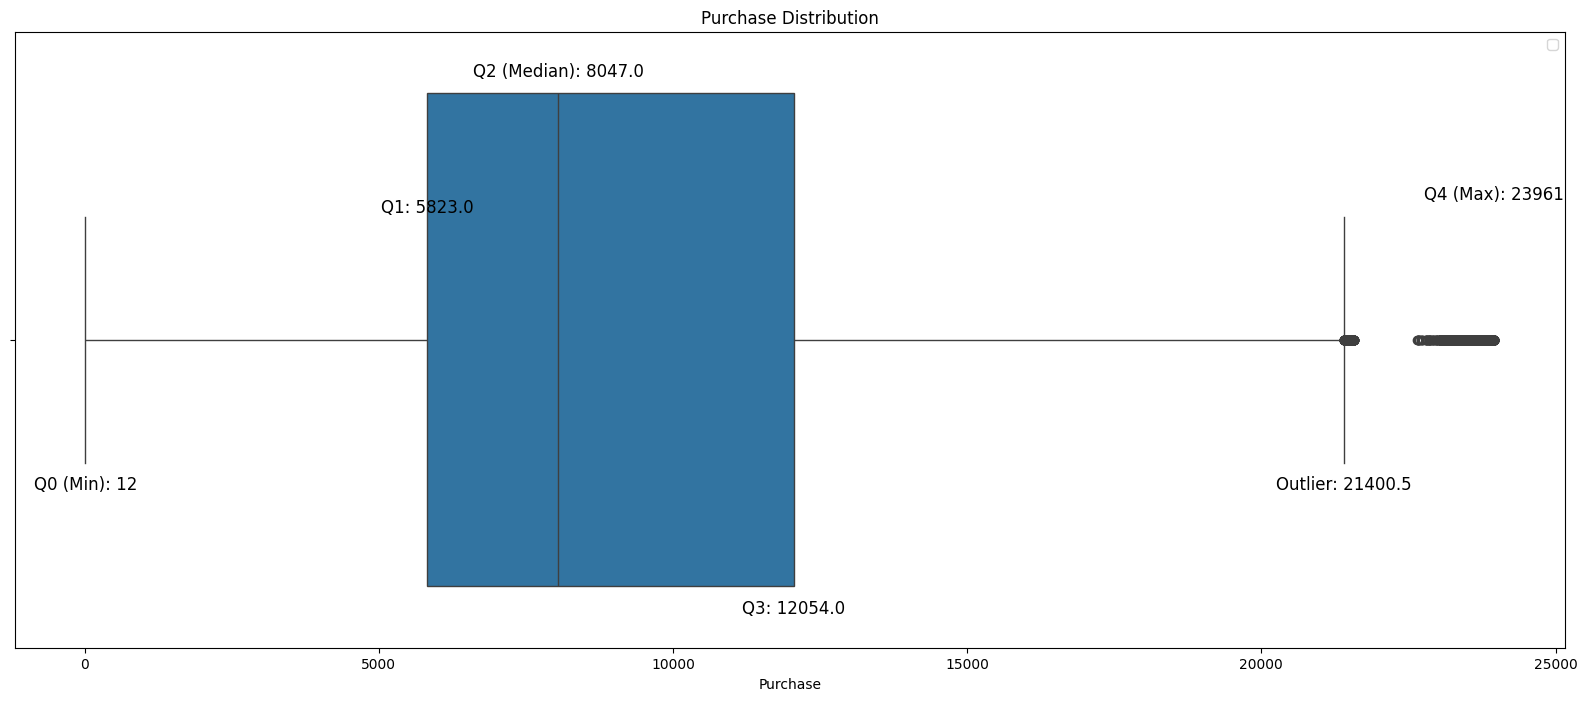

In [30]:
q1, q2, q3 = np.percentile(walmart['Purchase'], [25, 50, 75])
min_value = np.min(walmart['Purchase'])  # Q0 (Min)
max_value = np.max(walmart['Purchase'])  # Q4 (Max)
outlier = q3 + 1.5 * (q3 - q1)

plt.figure(figsize=(20, 8))
sns.boxplot(data=walmart['Purchase'],orient='h')
ax = plt.gca()

# Annotate the points (text labels for quartiles)
ax.text(q1,-0.2, f'Q1: {q1}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=12)
ax.text(q2,-0.45, f'Q2 (Median): {q2}', horizontalalignment='center', verticalalignment='top', color='black', fontsize=12)
ax.text(q3,0.45, f'Q3: {q3}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=12)
ax.text(min_value,0.25, f'Q0 (Min): {min_value}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=12)
ax.text(max_value,-0.25, f'Q4 (Max): {max_value}', horizontalalignment='center', verticalalignment='top', color='black', fontsize=12)
ax.text(outlier,0.25, f'Outlier: {outlier}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=12)


# Display the plot
plt.title('Purchase Distribution')
plt.legend()
plt.show()

In [ ]:
len(walmart.loc[walmart['Purchase']>=outlier]) # 2677

2677

**Insight:**
There are total of 2677 outliers which is roughly 0.48% of the total data present in purchase amount. We will not remove them as it indicates a broad range of spending behaviors during the sale, highlighting the importance of tailoring marketing strategies to both regular and high-value customers to maximize revenue.

**Non-Graphic Analysis:**

In [31]:
#Non- Graphic Analysis

# Checking how categorical variables contributes to the entire data
categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
walmart[categ_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(walmart)

value
variable                   value              
Age                        0-17       0.027455
                           18-25      0.181178
                           26-35      0.399200
                           36-45      0.199999
                           46-50      0.083082
                           51-55      0.069993
                           55+        0.039093
City_Category              A          0.268549
                           B          0.420263
                           C          0.311189
Gender                     F          0.246895
                           M          0.753105
Marital_Status             Married    0.409653
                           Unmarried  0.590347
Stay_In_Current_City_Years 0          0.135252
                           1          0.352358
                           2          0.185137
                           3          0.173224
                           4+         0.154028

**Insight:**


1. 40% of the purchase done by aged 26-35 and 78% purchase are done by the customers aged between the age 18-45 (40%: 26-35, 18%: 18-25, 20%: 36-45)
2. 75% of the purchase count are done by Male and 25% by Female
3. 60% Single, 40% Married contributes to the purchase count.
4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
5. There are 20 product categories in total.
6. There are 20 different types of occupations in the city.

In [32]:
#Checking how the data is spread basis distinct users

temp_df1=walmart.groupby(['User_ID'])['Age'].unique()
temp_df1.value_counts()/len(temp_df1)

,count
Age,
[26-35],0.348498
[36-45],0.198099
[18-25],0.181463
[46-50],0.090137
[51-55],0.081650
[55+],0.063147
[0-17],0.037006


**Insight:**

1. We can see 35% of the users are aged 26-35. 73% of users are aged between 18-45.
2. From the previous observation we saw 40% of the purchase are done by users aged 26-35. And, we have 35% of users aged between 26-35 and they are contributing 40% of total purchase count.So, we can infer users aged 26-35 are more frequent  customers.

In [33]:
temp_df2=walmart.groupby(['User_ID'])['Gender'].unique()
temp_df2.value_counts()/len(temp_df2)

,count
Gender,
[M],0.717196
[F],0.282804


**Insight:**

We have 72% male users and 28% female users. Combining with previous observations we can see 72% of male users contributing to 75% of the purchase count and 28% of female users are contributing to 25% of the purchase count.

In [34]:
temp_df2=walmart.groupby(['User_ID'])['Marital_Status'].unique()
temp_df2.value_counts()/len(temp_df2)

,count
Marital_Status,
[Unmarried],0.580037
[Married],0.419963


**Insight:**

*  We have 58% of the single users and 42% of married users. Combining with previous observation, single users contributes more as 58% of the single contributes to the 60% of the purchase count.

In [35]:
df2=walmart.groupby(['User_ID'])['City_Category'].unique()
df2.value_counts()/len(df2)

,count
City_Category,
[C],0.532847
[B],0.289764
[A],0.177389


**Insight:**

*  53% of the users belong to city category C whereas 29% to category B and 18% belong to category A. Combining from the previous observation category B purchase count is 42% and Category C purchase count is 31%. We can clearly see category B are more actively purchasing inspite of the fact they are only 28% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.

In [36]:
#Checking the age group distribution in different city categories

pd.crosstab(index=walmart["City_Category"],columns=walmart["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


**Insight:**

*  We have seen earlier that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results large percentage of customers aged 26-35 for B(40%) and A (50%) which can be the reason for these city categories to be more actively purchasing.

In [37]:
#Checking how genders are contributing towards toatl purchase amount

df2=pd.DataFrame(walmart.groupby(['Gender'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


**Insight:**

*  We can see male(72% of the population) contributes to more than 76% of the total purchase amount whereas female(28% of the population) contributes 23% of the total purchase amount.

In [38]:
#Checking how purchase value are spread among differnt age categories
df2=pd.DataFrame(walmart.groupby(['Age'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


**Insight:**

*  We can see the net purchase amount spread is similar to the purchase count spread among the different age groups.

In [39]:
df2=pd.DataFrame(walmart.groupby(['Marital_Status'])['Purchase'].sum())

df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Marital_Status,,
Married,2086885295,40.952943
Unmarried,3008927447,59.047057


**Insight:**

*  Single users are contributing 59% towards the total purchase amount in comparison to 41% by married users.

In [40]:
df2=pd.DataFrame(walmart.groupby(['City_Category'])['Purchase'].sum())

df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
City_Category,,
A,1316471661,25.834381
B,2115533605,41.515136
C,1663807476,32.650483


**Insight:**

City_category contribution to the total purchase amount is also similar to their contribution towards Purchase count. Still, combining with previous observation we can City_category C although has percentage purchase count of 31% but they contribute more in terms of purchase amount i.e. 32.65%. We can infer City category C purchase higher value products.

In [41]:
# Users with highest number of purchases
walmart.groupby(['User_ID'])['Purchase'].count().nlargest(10)

,Purchase
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
1003618,767
1001150,752
1001015,740
1005795,729


In [42]:
#Users with highest purchases amount
walmart.groupby(['User_ID'])['Purchase'].sum().nlargest(10)

,Purchase
User_ID,
1004277,10536909
1001680,8699596
1002909,7577756
1001941,6817493
1000424,6573609
1004448,6566245
1005831,6512433
1001015,6511314
1003391,6477160


**Insight:**

The users with high number of purchases contribute more to the purchase amount. Still, we can see there are few users not in the list of top 10 purchase counts are there in list of top 10 purchase amount. Also, the user 1004277 with lesser purchase count(979) has a much higher purchase amount than the user(1001680) with top purchase count.

In [43]:
df2=pd.DataFrame(walmart.groupby(['Occupation'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Occupation,,
0,635406958,12.469198
1,424614144,8.332609
2,238028583,4.671062
3,162002168,3.179123
4,666244484,13.074352
5,113649759,2.230258
6,188416784,3.697482
7,557371587,10.937835
8,14737388,0.289206


**Insight:**

Some of the Occupation like 0, 4, 7 has contributed more towards total purchase amount.

In [44]:
df2=pd.DataFrame(walmart.groupby(['Product_Category'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Product_Category,,
1,1910013754,37.482024
2,268516186,5.269350
3,204084713,4.004949
4,27380488,0.537313
5,941835229,18.482532
6,324150302,6.361111
7,60896731,1.195035
8,854318799,16.765114
9,6370324,0.125011


**Insight:**

*  1, 8, 5 are among the highest yielding product categories and 19, 20, 13 are among the lowest in terms of their contribution to total amount.

In [45]:
df2=pd.DataFrame(walmart.groupby(['Stay_In_Current_City_Years'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Stay_In_Current_City_Years,,
0,682979229,13.402754
1,1792872533,35.183250
2,949173931,18.626547
3,884902659,17.365290
4+,785884390,15.422160


# **Univariate Analysis**



**Gender,  Marital Status & City Category Distribution**

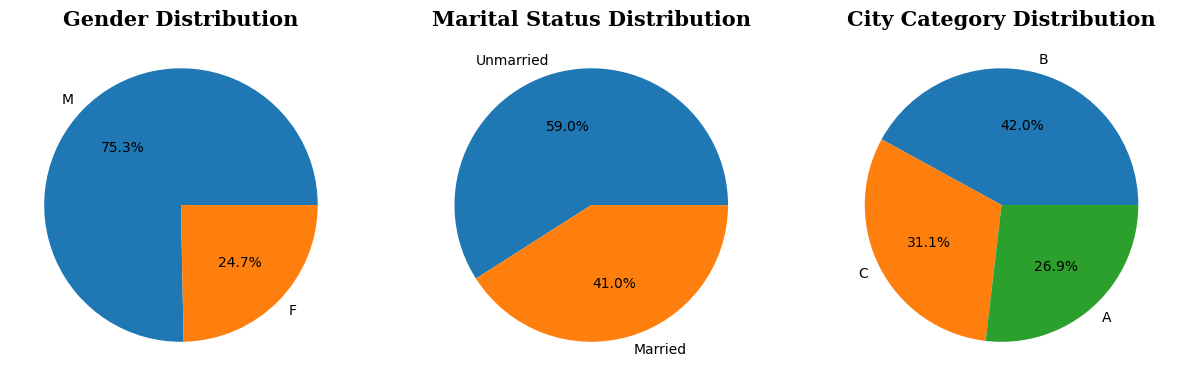

In [46]:
fig = plt.figure(figsize = (15,12))
gs = fig.add_gridspec(1,3)

                                        # creating pie chart for gender disribution
ax0 = fig.add_subplot(gs[0,0])
ax0.pie(walmart['Gender'].value_counts().values,labels = walmart['Gender'].value_counts().index,autopct = '%.1f%%')
ax0.set_title('Gender Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for marital status

ax1 = fig.add_subplot(gs[0,1])
ax1.pie(walmart['Marital_Status'].value_counts().values,labels = walmart['Marital_Status'].value_counts().index,autopct = '%.1f%%')
ax1.set_title('Marital Status Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for city category

ax1 = fig.add_subplot(gs[0,2])
ax1.pie(walmart['City_Category'].value_counts().values,labels = walmart['City_Category'].value_counts().index,autopct = '%.1f%%')
ax1.set_title('City Category Distribution',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()

**🔍 Insights**

* **Gender Distribution** - Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.

* **Marital Status** - Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or promotions that appeal to this group.

*  **City Category** - City B saw the most number of transactions followed by City C and City A respectively

**Customer Age Distribution**

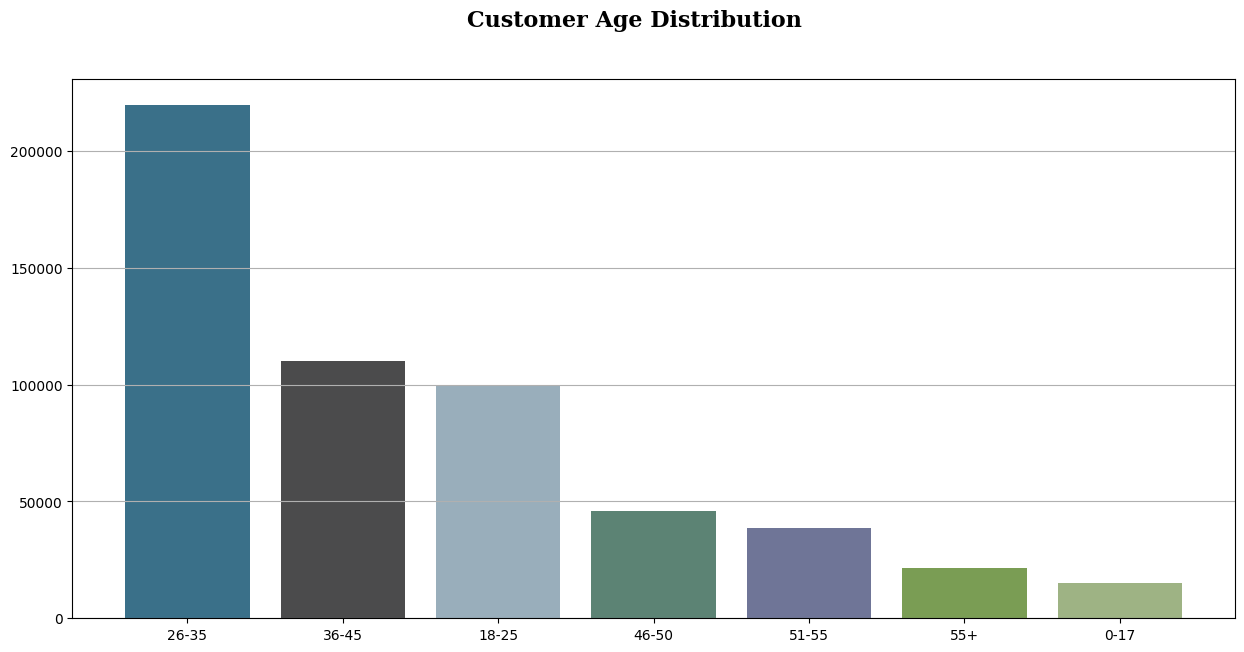

In [47]:
#setting the plot style
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(1,1)

ax0 = fig.add_subplot(gs[0,0])
colors1 = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
ax0.bar(x=walmart['Age'].value_counts().index,height = walmart['Age'].value_counts().values,zorder = 1,color=colors1)
ax0.grid(axis='y',zorder=0)
fig.suptitle('Customer Age Distribution',font = 'serif', size = 16, weight = 'bold')

plt.show()

**🔍 Insights**

*  The age group of 26-35 represents the largest share of Walmart's Black Friday sales, accounting for 40% of the sales. This suggests that the young and middle-aged adults are the most active and interested in shopping for deals and discounts.

*  The 36-45 and 18-25 age groups are the second and third largest segments, respectively, with 20% and 18% of the sales. This indicates that Walmart has a diverse customer base that covers different life stages and preferences..

*  The 46-50, 51-55, 55+, and 0-17 age groups are the smallest customer segments, with less than 10% of the total sales each. This implies that Walmart may need to improve its marketing strategies and product offerings to attract more customers from these age groups, especially the seniors and the children.

**Customer Stay In current City Distribution**

<ipython-input-48-7191caffb91c>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(temp.index,fontweight = 'bold')


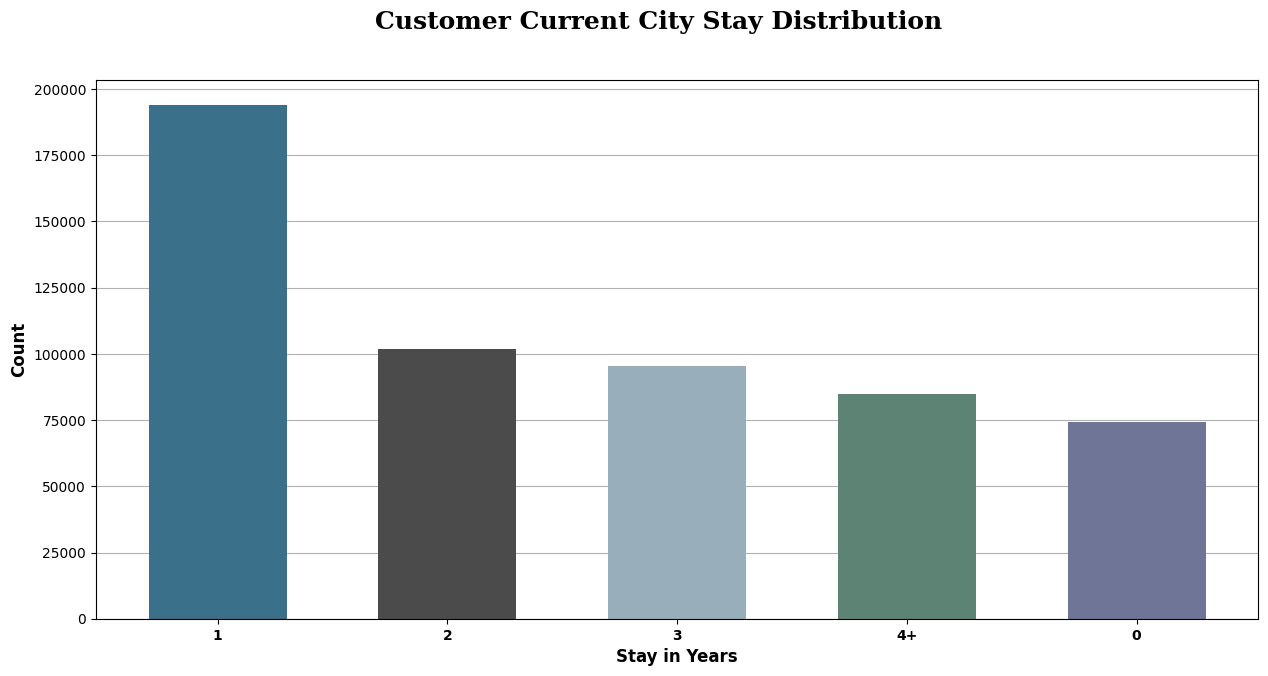

In [48]:
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(1,1)

                            # creating bar chart for Customer Stay In current City

ax1 = fig.add_subplot(gs[0,0])
temp = walmart['Stay_In_Current_City_Years'].value_counts()
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597']
ax1.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2,width = 0.6)
ax1.grid(axis='y',zorder=0)
ax1.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax1.set_xlabel('Stay in Years',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp.index,fontweight = 'bold')
fig.suptitle('Customer Current City Stay Distribution',font = 'serif', size = 18, weight = 'bold')
plt.show()

**🔍 Insights**

*  The data suggests that the customers are either new to the city or move frequently, and may have different preferences and needs than long-term residents.

*  The majority of the customers (49%) have stayed in the current city for one year or less. This suggests that Walmart has a strong appeal to newcomers who may be looking for affordable and convenient shopping options.

*  4+ years category (14%) customers indicates that Walmart has a loyal customer base who have been living in the same city for a long time.

*  The percentage of customers decreases as the stay in the current city increases which suggests that Walmart may benefit from targeting long-term residents for loyalty programs and promotions.

**Insights:**

**Age Group Distribution:**

The age group '26-35' has the highest count, indicating that customers in this age range make the most purchases. It is followed by the age groups '36-45' and '18-25'.

**Occupation Analysis:**

Occupation '4' has the highest count, suggesting that customers with occupation '4' have the highest representation in the dataset. Occupations '0', '7', and '1' also have significant counts.

**City Category Distribution:**

City_Category 'B' has the highest count, indicating that customers from City_Category 'B' have made the most purchases. City_Category 'C' and 'A' follow in terms of count.

**Marital Status Impact:**

Customers with a marital status of 'Single' have a higher count compared to those who are 'Married', suggesting that single individuals make more purchases in the dataset.

**City Residence Duration Impact:**

Customers who have stayed in their current city for more than 1 year show a higher purchase tendency, suggesting a positive correlation between the duration of stay and purchasing behavior.

**Top 10 Products and Categories: Sales Snapshot**

**Q.Top 10 Products and Product Categories which has sold most during Black Friday Sales**

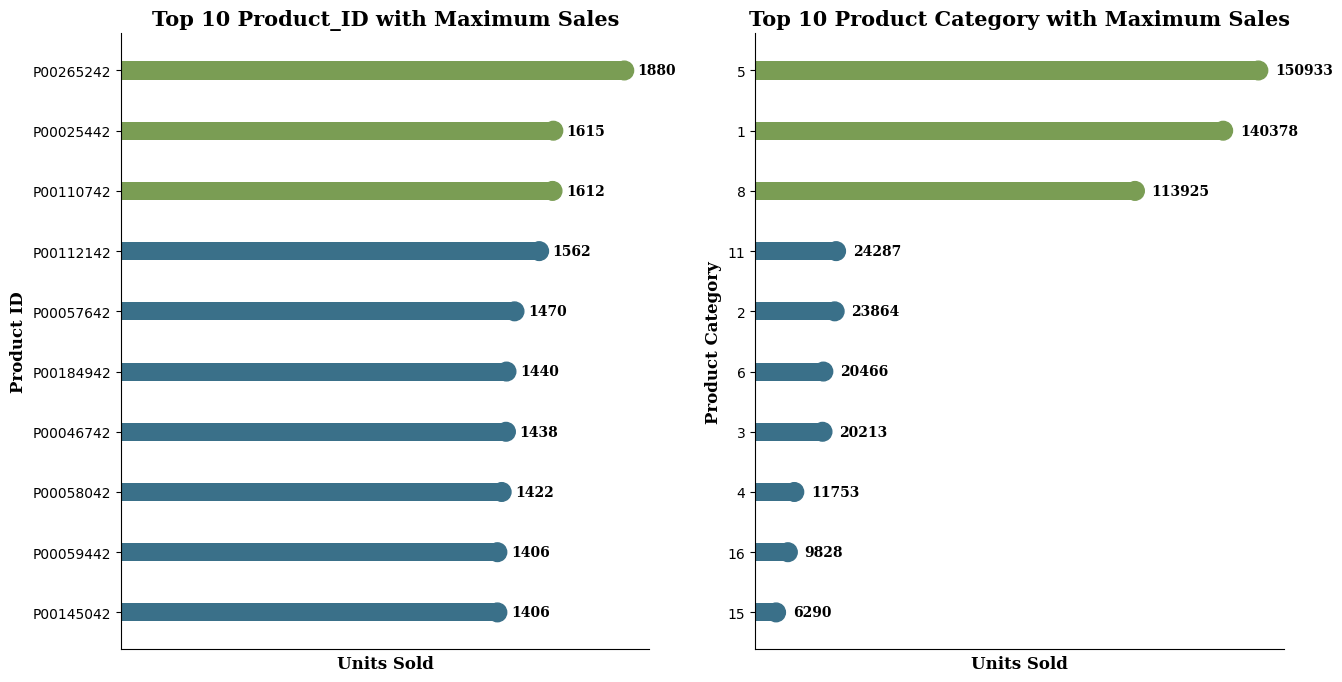

In [49]:
walmart['Product_Category'] = walmart['Product_Category'].astype(str)
top10_product_ID=walmart['Product_ID'].value_counts()[0:10]
top10_Product_Category = walmart['Product_Category'].value_counts()[0:10]
temp1 =top10_product_ID.iloc[-1:-11:-1]
temp2 = top10_Product_Category.iloc[-1:-11:-1]

fig=plt.figure(figsize=(15,8))
gs=fig.add_gridspec(1,2)

#Top 10 Product_ID Sales

ax=fig.add_subplot(gs[0,0])
color_map =  ['#3A7089' for i in range(7)] + ["#7A9D54" for i in range(3)]
ax.barh(y=temp1.index,width=temp1.values,color=color_map,height = 0.3)
#adding label to each bar
for y,x in zip(temp1.index,temp1.values):
    ax.text( x + 50 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')
ax.scatter(y=temp1.index,x=temp1.values,s=180,color=color_map )
ax.set_xticks([])
ax.set_title('Top 10 Product_ID with Maximum Sales',{'font':'serif', 'size':15,'weight':'bold'})
ax.set_xlabel('Units Sold',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Product ID',{'font':'serif', 'size':12,'weight':'bold'})
ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

#Top 10 Product Category Sales

ax = fig.add_subplot(gs[0,1])
ax.barh(y = temp2.index,width = temp2.values,height = 0.3,color = color_map,zorder=2)
#adding label to each bar
for y,x in zip(temp2.index,temp2.values):
    ax.text( x + 5000 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')
ax.scatter(y = temp2.index, x = temp2.values, s = 180 , color = color_map )
ax.set_xlabel('Units Sold',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Product Category',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_xticks([])
ax.set_title('Top 10 Product Category with Maximum Sales',{'font':'serif', 'size':15,'weight':'bold'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**🔍 Insights**

* **Top 10 Products Sold** - The top-selling products during Walmart's Black Friday sales are characterized by a relatively small variation in sales numbers, suggesting that Walmart offers a variety of products that many different customers like to buy.

* **Top 10 Product Categories** - Categories 5,1 and 8 have significantly outperformed other categories with combined Sales of nearly 75% of the total sales suggesting a strong preference for these products among customers.

**Top 10 Customer Occupation**

**Top 10 Occupation of Customer  in Black Friday Sales**

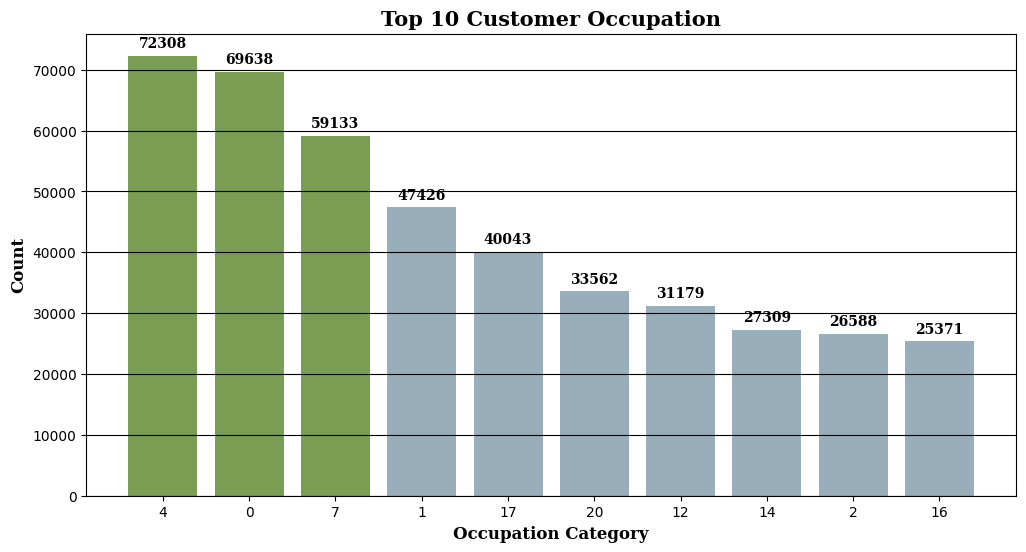

In [ ]:
walmart['Occupation'] =  walmart['Occupation'].astype(str)

temp=walmart['Occupation'].value_counts()[:10]
fig,ax=plt.subplots(figsize=(12,6))

color_map =  ["#7A9D54" for i in range(3)] +  ['#99AEBB' for i in range(7)]
ax.bar(temp.index,temp.values,color=color_map)

for x,y in zip(temp.index,temp.values):
    ax.text(x, y + 2000, y,{'font':'serif', 'size':10,'weight':'bold'},va='center',ha = 'center')

ax.grid(color = 'black',axis = 'y',zorder = 0)
ax.set_title('Top 10 Customer Occupation',{'font':'serif', 'size':15,'weight':'bold'})
ax.set_xlabel('Occupation Category',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Count',{'font':'serif', 'size':12,'weight':'bold'})
plt.show()

# **Bivariate Analysis**

<ipython-input-91-c6323c5e6f5d>:7: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data = walmart, x = 'Gender', y  = 'Purchase' ,ax = ax0,width = 0.5, palette =color_map)
<ipython-input-91-c6323c5e6f5d>:13: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.boxplot(data = walmart, x = 'City_Category', y  = 'Purchase' ,ax = ax1,width = 0.5, palette =color_map)
<ipython-input-91-c6323c5e6f5d>:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data = walmart, x = 'Marital_Status', y  = 'Purchase' ,ax = ax2,width = 0.5, palette =color_map)
<ipython-input-91-c6323c5e6f5d>:25: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.boxplot(data = walmart, x = 'Stay_In_Current_City_Years', y  = 'Purchase' ,ax = ax3,width = 0.5, palette =color_map)


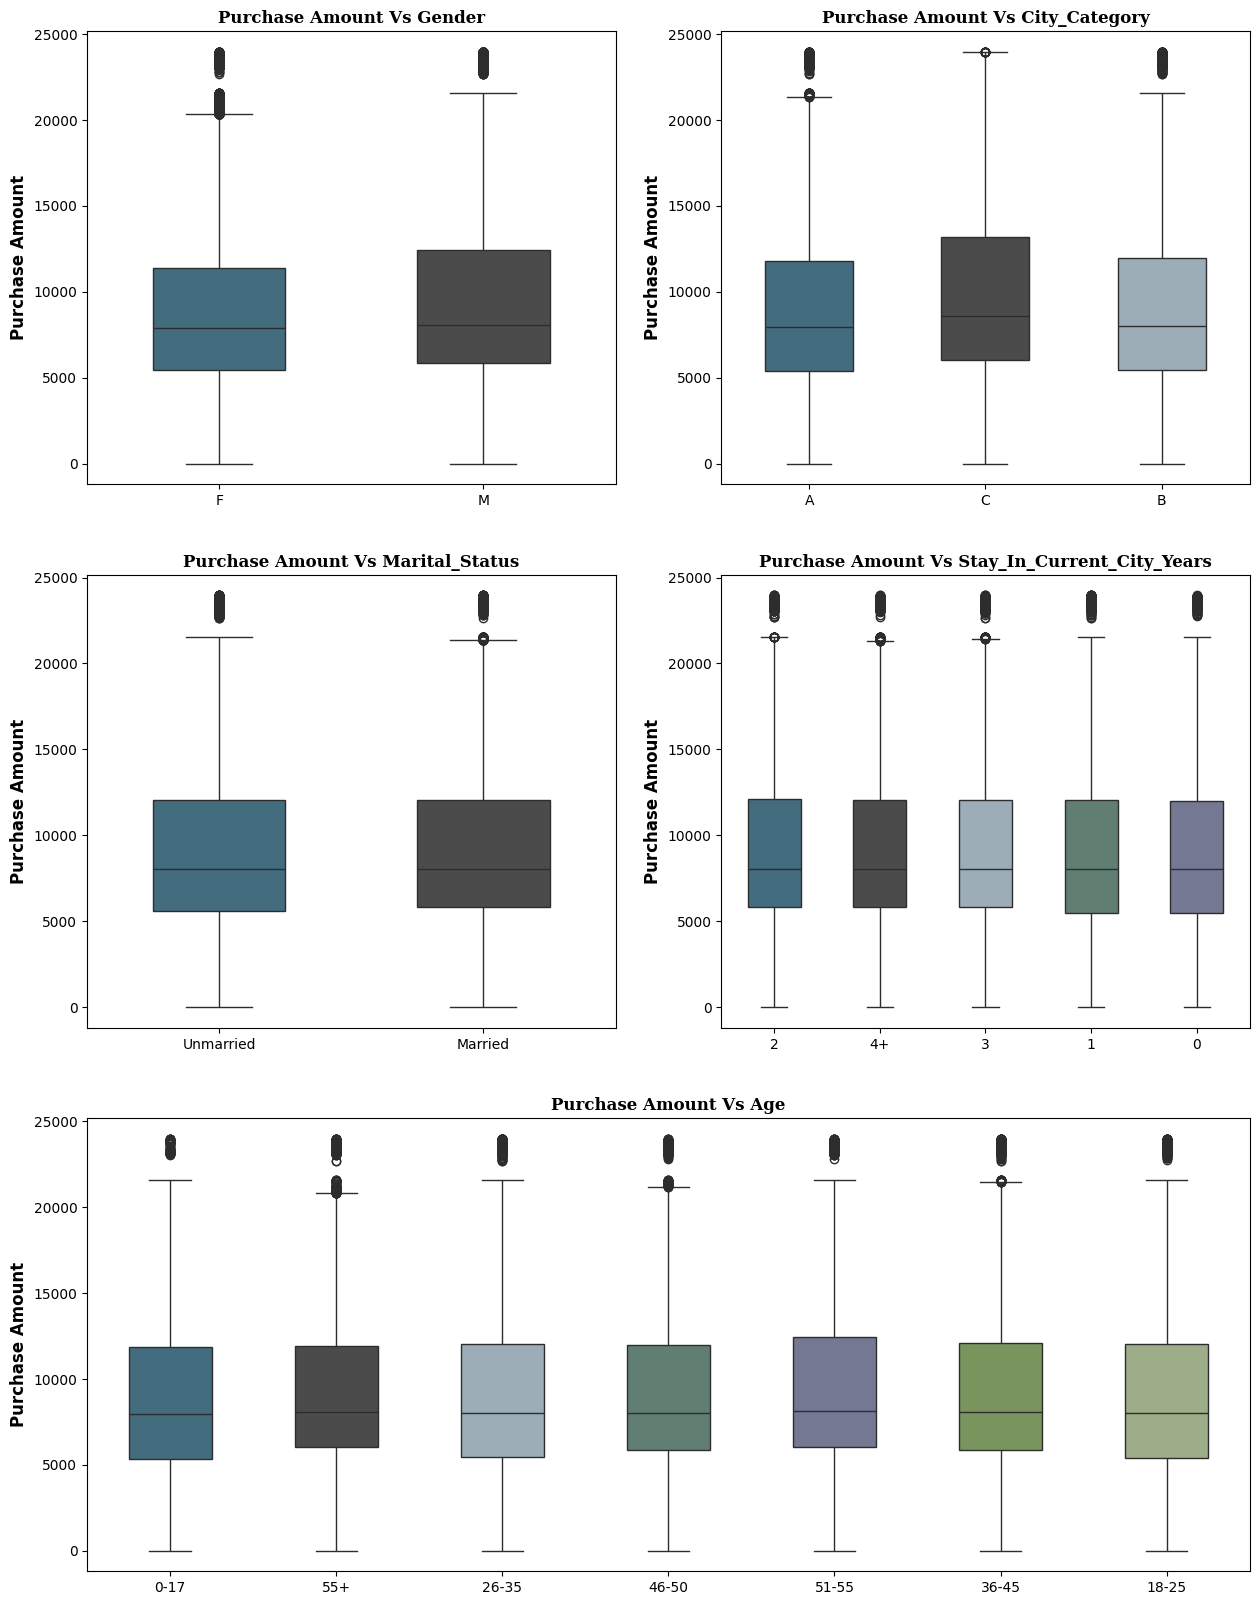

In [ ]:
fig = plt.figure(figsize = (15,20))
gs = fig.add_gridspec(3,2)

color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']

ax0=fig.add_subplot(gs[0,0])
sns.boxplot(data = walmart, x = 'Gender', y  = 'Purchase' ,ax = ax0,width = 0.5, palette =color_map)
ax0.set_title(f'Purchase Amount Vs Gender',{'font':'serif', 'size':12,'weight':'bold'})
ax0.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax0.set_xlabel('')

ax1=fig.add_subplot(gs[0,1])
sns.boxplot(data = walmart, x = 'City_Category', y  = 'Purchase' ,ax = ax1,width = 0.5, palette =color_map)
ax1.set_title(f'Purchase Amount Vs City_Category',{'font':'serif', 'size':12,'weight':'bold'})
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xlabel('')

ax2=fig.add_subplot(gs[1,0])
sns.boxplot(data = walmart, x = 'Marital_Status', y  = 'Purchase' ,ax = ax2,width = 0.5, palette =color_map)
ax2.set_title(f'Purchase Amount Vs Marital_Status',{'font':'serif', 'size':12,'weight':'bold'})
ax2.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax2.set_xlabel('')

ax3=fig.add_subplot(gs[1,1])
sns.boxplot(data = walmart, x = 'Stay_In_Current_City_Years', y  = 'Purchase' ,ax = ax3,width = 0.5, palette =color_map)
ax3.set_title(f'Purchase Amount Vs Stay_In_Current_City_Years',{'font':'serif', 'size':12,'weight':'bold'})
ax3.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax3.set_xlabel('')

ax4=fig.add_subplot(gs[2,:])
sns.boxplot(data = walmart, x = 'Age', y  = 'Purchase' ,ax = ax4,width = 0.5, palette =color_map)
ax4.set_title(f'Purchase Amount Vs Age',{'font':'serif', 'size':12,'weight':'bold'})
ax4.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax4.set_xlabel('')

plt.show()

**🔍 Insights**
Out of all the variables analysed above, it's noteworthy that the purchase amount remains relatively stable regardless of the variable under consideration. As indicated in the data, the median purchase amount consistently hovers around 8,000 USD, regardless of the specific variable being examined.

**Q. Are women spending more money per transaction than men? Why or Why not?**

**Average amount spends per customer for Male and Female**

In [50]:
avgamt_gender = walmart.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
avgamt_gender = avgamt_gender.reset_index()
avgamt_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [51]:
 # Gender wise count in the entire data
avgamt_gender['Gender'].value_counts()

,count
Gender,
M,4225
F,1666


Text(0.5, 1.0, 'Males Avg Spend')

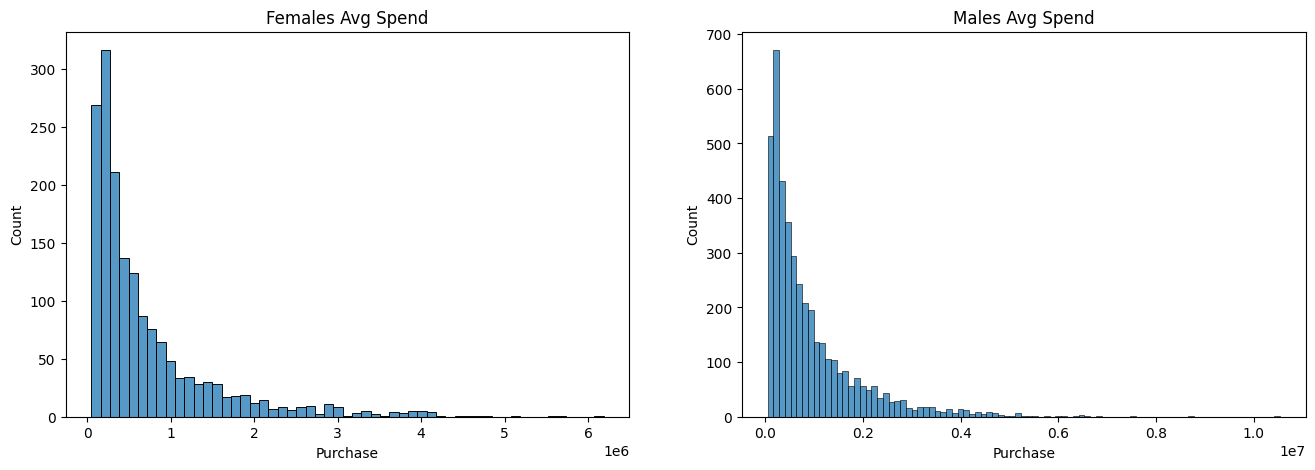

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=avgamt_gender[avgamt_gender['Gender']=='F']['Purchase'], ax=axs[0]).set_title("Females Avg Spend")
sns.histplot(data=avgamt_gender[avgamt_gender['Gender']=='M']['Purchase'], ax=axs[1]).set_title("Males Avg Spend")


**Insight:**

*  Average amount spend by males are higher than females.

In [53]:
avgamt_gender.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [54]:
avgamt_gender.groupby(['Gender'])['Purchase'].sum()

,Purchase
Gender,
F,1186232642
M,3909580100


**Insight:**

*  Average amount for the males is 925344 for the entire population whereas it's much lesser for females(712024).
*  Total amount spend by males is around 4 billion whereas for females it's 1.2 billion.   

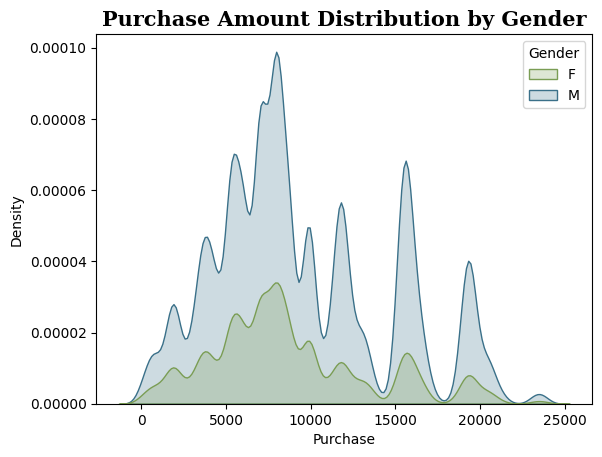

In [55]:
color_map = ['#7A9D54','#3A7089']
sns.kdeplot(data=walmart, x= 'Purchase' , hue='Gender',palette=color_map,fill=True)
plt.title('Purchase Amount Distribution by Gender',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()

**Insights:**
Men spent more money than women during the Black Friday sale.

The total number of male customers (4225) exceeds the total number of female customers (1666).

The average amount spent by male customers (9437) is higher than the average amount spent by female customers (8734).

With a larger male customer base, it is likely that men will make more purchases compared to females.

The higher sales among male customers could be attributed to a product range better suited to their preferences, leading to increased sales of products targeted towards men.

# **Confidence Interval Construction:**

# *** Confidence Interval & CLT Considering Gender ***

In [56]:
avgamt_male = avgamt_gender[avgamt_gender['Gender']=='M']
avgamt_female = avgamt_gender[avgamt_gender['Gender']=='F']

In [57]:
#Finding the sample(sample size=1000) for avg purchase amount for males and females
genders = ["M", "F"]

sample_size = 1000

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)


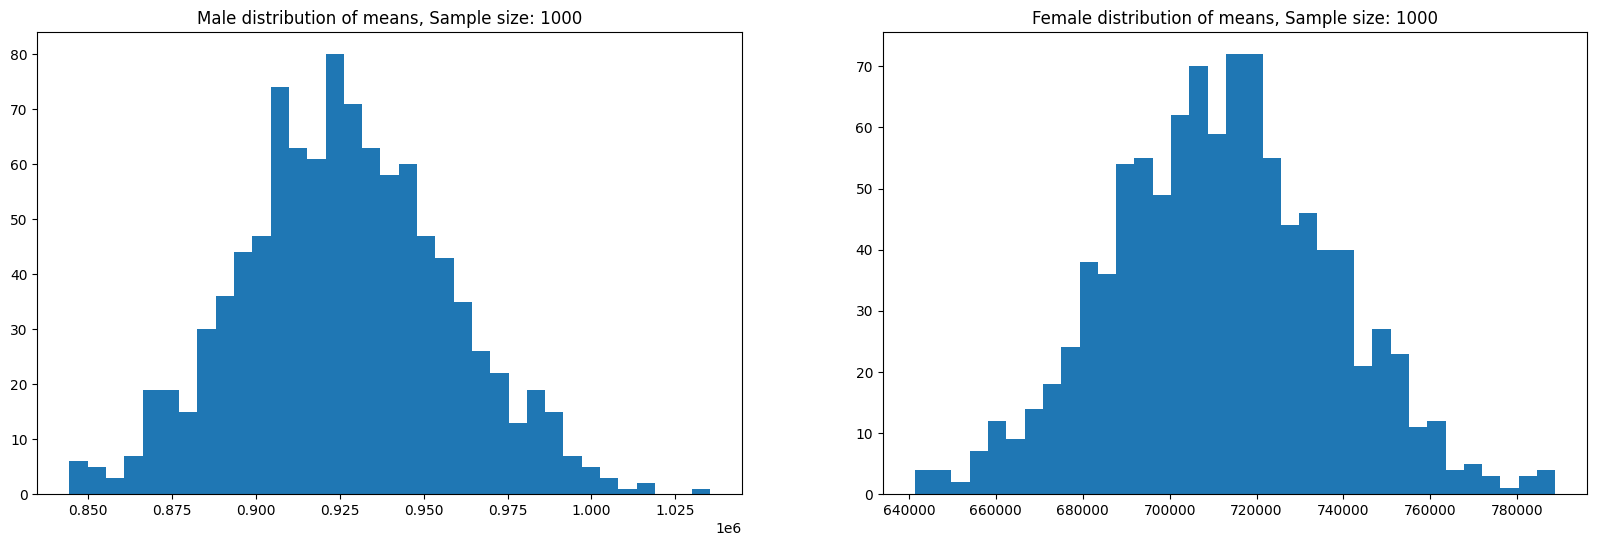

In [58]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 1000")
axis[1].set_title("Female distribution of means, Sample size: 1000")

plt.show()

<Axes: ylabel='Density'>

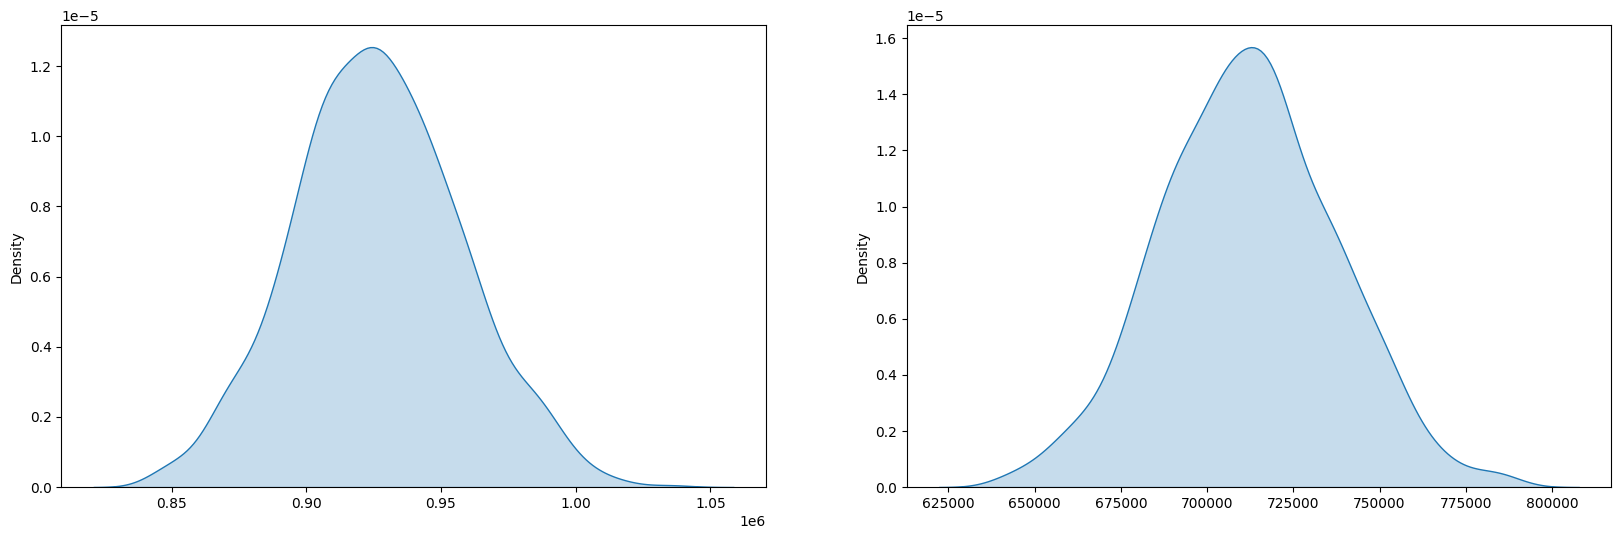

In [60]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.kdeplot(male_means, fill=True, ax=axis[0])
sns.kdeplot(female_means, fill=True, ax=axis[1])

**Insight:**

The means sample seems to be normally distributed for both males and females. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

**Calculating 90% ,95% & 99% confidence interval for sample size 1000:**

In [ ]:
# Define the z-values for different confidence intervals
z_values = {
    90: 1.645,
    95: 1.960,
    99: 2.576
}

# Print population averages
print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

# Print sample averages
print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

# Print sample standard deviations and errors
print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

sample_std_error_male = pd.Series(male_means).std() / np.sqrt(1000)
sample_std_error_female = pd.Series(female_means).std() / np.sqrt(1000)
print("Sample std error for Male: {:.2f}".format(sample_std_error_male))
print("Sample std error for Female: {:.2f}\n".format(sample_std_error_female))

# Calculate sample means
sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

# Loop over each confidence level and calculate the confidence intervals
for ci, z in z_values.items():
    # Calculate upper and lower confidence intervals for Male and Female
    Upper_Limit_male = z * sample_std_error_male + sample_mean_male
    Lower_Limit_male = sample_mean_male - z * sample_std_error_male

    Upper_Limit_female = z * sample_std_error_female + sample_mean_female
    Lower_Limit_female = sample_mean_female - z * sample_std_error_female

    # Print confidence intervals for Male and Female
    print(f"{ci}% Confidence Interval for Male: [{Lower_Limit_male:.2f}, {Upper_Limit_male:.2f}]")
    print(f"{ci}% Confidence Interval for Female: [{Lower_Limit_female:.2f}, {Upper_Limit_female:.2f}]\n")

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 926005.10
Sample avg spend amount for Female: 711398.93

Sample std for Male: 31902.12
Sample std for Female: 26307.68

Sample std error for Male: 1008.83
Sample std error for Female: 831.92

90% Confidence Interval for Male: [924345.57, 927664.63]
90% Confidence Interval for Female: [710030.42, 712767.44]

95% Confidence Interval for Male: [924027.79, 927982.41]
95% Confidence Interval for Female: [709768.36, 713029.50]

99% Confidence Interval for Male: [923406.34, 928603.86]
99% Confidence Interval for Female: [709255.90, 713541.96]



**Insight:**

Now using the Confidence interval at 99%, we can say that:

Average amount spend by male customers lie in the range 9,23,406.34 - 9,28,603.86

Average amount spend by female customers lie in range 7,09,255.90 - 7,13,541.96

**Calculating 90%. 95% & 99%  confidence interval for sample size 1500:**

In [61]:
#Finding the sample(sample size=1000) avg purchase amount for males and females
genders = ["M", "F"]

sample_size = 1500

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)



# Define the z-values for different confidence intervals
z_values = {
    90: 1.645,
    95: 1.960,
    99: 2.576
}

# Print population averages
print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

# Print sample averages
print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

# Print sample standard deviations and errors
print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

sample_std_error_male = pd.Series(male_means).std() / np.sqrt(1000)
sample_std_error_female = pd.Series(female_means).std() / np.sqrt(1000)
print("Sample std error for Male: {:.2f}".format(sample_std_error_male))
print("Sample std error for Female: {:.2f}\n".format(sample_std_error_female))

# Calculate sample means
sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

# Loop over each confidence level and calculate the confidence intervals
for ci, z in z_values.items():
    # Calculate upper and lower confidence intervals for Male and Female
    Upper_Limit_male = z * sample_std_error_male + sample_mean_male
    Lower_Limit_male = sample_mean_male - z * sample_std_error_male

    Upper_Limit_female = z * sample_std_error_female + sample_mean_female
    Lower_Limit_female = sample_mean_female - z * sample_std_error_female

    # Print confidence intervals for Male and Female
    print(f"{ci}% Confidence Interval for Male: [{Lower_Limit_male:.2f}, {Upper_Limit_male:.2f}]")
    print(f"{ci}% Confidence Interval for Female: [{Lower_Limit_female:.2f}, {Upper_Limit_female:.2f}]\n")

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 924258.17
Sample avg spend amount for Female: 712541.27

Sample std for Male: 25921.85
Sample std for Female: 19325.74

Sample std error for Male: 819.72
Sample std error for Female: 611.13

90% Confidence Interval for Male: [922909.73, 925606.61]
90% Confidence Interval for Female: [711535.95, 713546.58]

95% Confidence Interval for Male: [922651.52, 925864.82]
95% Confidence Interval for Female: [711343.45, 713739.09]

99% Confidence Interval for Male: [922146.57, 926369.77]
99% Confidence Interval for Female: [710966.99, 714115.55]



**Note:**

By increasing the sample size we can see confidence interval is more closer to the population mean.

# ***CLT and Confidence interval considering marital status:***

<Axes: xlabel='Purchase', ylabel='Density'>

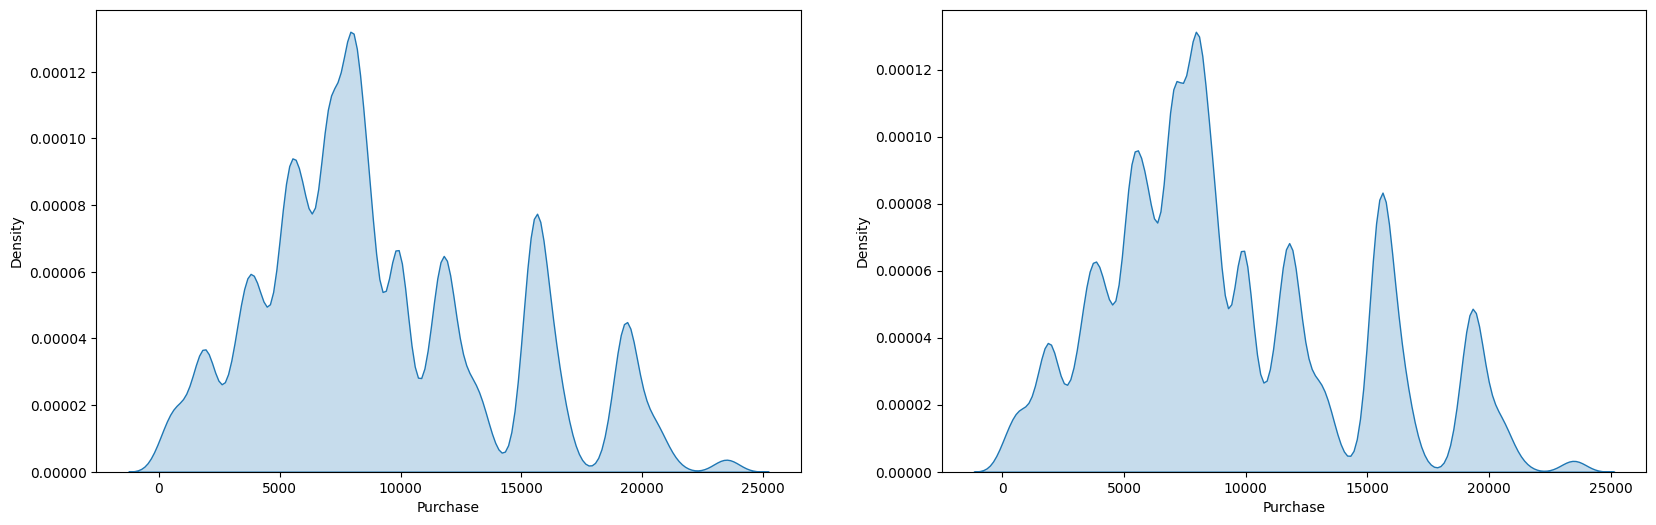

In [68]:
avgamt_married= walmart[walmart['Marital_Status']=='Married']['Purchase']
avgamt_unmarried = walmart[walmart['Marital_Status']=='Unmarried']['Purchase']

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.kdeplot(avgamt_married, fill=True, ax=axis[0])
sns.kdeplot(avgamt_unmarried, fill=True, ax=axis[1])

**Insight:**

Marital Status Distribution is not normal distribution.We are going with CLT theorem.

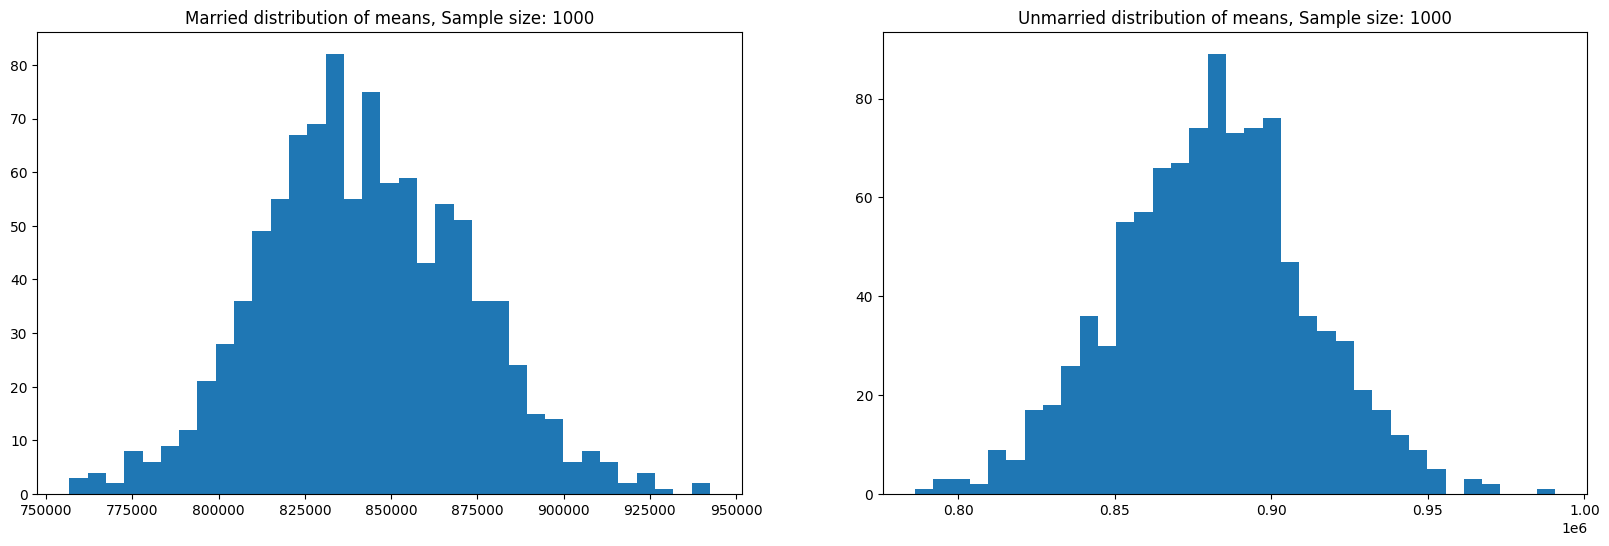

In [78]:
avg_Marital = walmart.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()

avgamt_married = avg_Marital[avg_Marital['Marital_Status']=='Married']
avgamt_single = avg_Marital[avg_Marital['Marital_Status']=='Unmarried']

sample_size = 1000
num_repitions = 1000
married_means = []
single_means = []

for i in range(num_repitions):
    avg_married = avg_Marital[avg_Marital['Marital_Status']=='Married'].sample(sample_size, replace=True)['Purchase'].mean()
    avg_single = avg_Marital[avg_Marital['Marital_Status']=='Unmarried'].sample(sample_size, replace=True)['Purchase'].mean()

    married_means.append(avg_married)
    single_means.append(avg_single)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35)
axis[1].hist(single_means, bins=35)
axis[0].set_title("Married distribution of means, Sample size: 1000")
axis[1].set_title("Unmarried distribution of means, Sample size: 1000")

plt.show()

<Axes: ylabel='Density'>

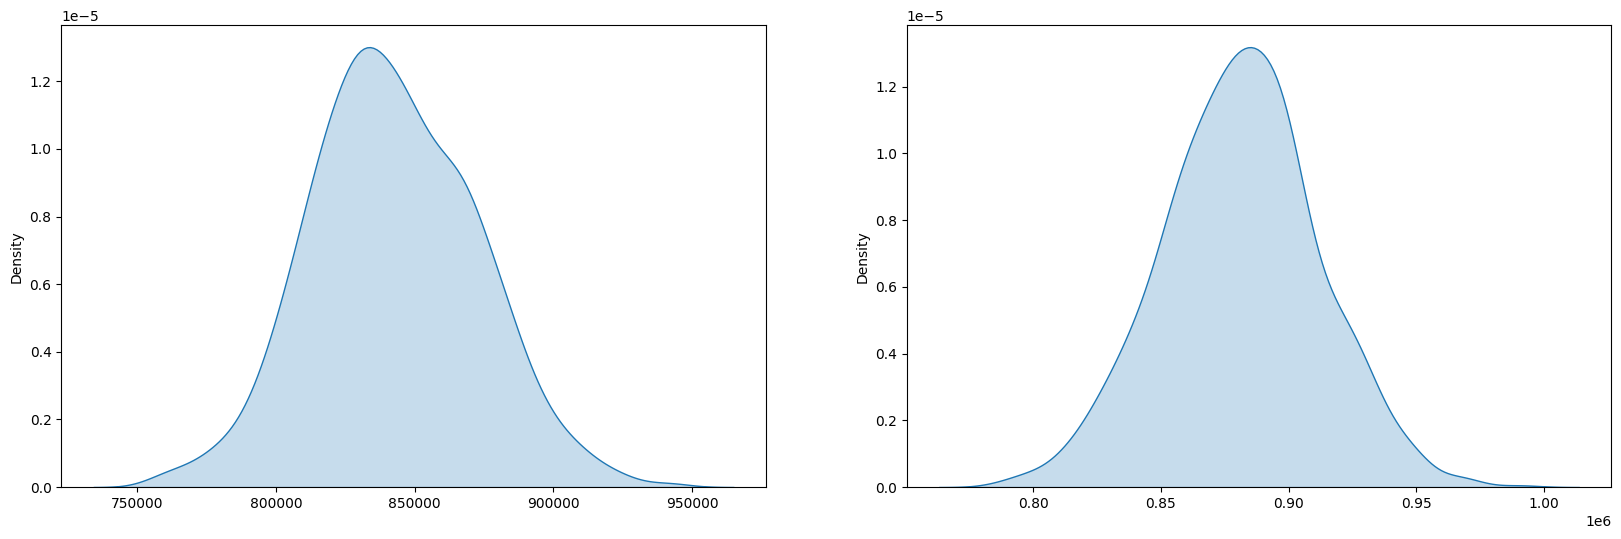

In [79]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.kdeplot(married_means, fill=True, ax=axis[0])
sns.kdeplot(single_means, fill=True, ax=axis[1])

In [80]:
avg_Marital['Marital_Status'].value_counts()

,count
Marital_Status,
Unmarried,3417
Married,2474


**Calculating 90%, 95% & 99%  confidence interval for avg expenses for married/single for sample size 1000:**

In [81]:
# Define the z-values for different confidence intervals
z_values = {
    90: 1.645,
    95: 1.960,
    99: 2.576
}

# Print population averages
print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

# Print sample averages
print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

# Print sample standard deviations and errors
print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

sample_std_error_married = pd.Series(married_means).std() / np.sqrt(1000)
sample_std_error_single = pd.Series(single_means).std() / np.sqrt(1000)
print("Sample std error for Married: {:.2f}".format(sample_std_error_married))
print("Sample std error for Single: {:.2f}\n".format(sample_std_error_single))

# Calculate sample means
sample_mean_married = np.mean(married_means)
sample_mean_single = np.mean(single_means)

sample_std_married = pd.Series(married_means).std()
sample_std_single = pd.Series(single_means).std()

# Loop over each confidence level and calculate the confidence intervals for both Married and Single
for ci, z in z_values.items():
    # Calculate upper and lower confidence intervals for Married and Single
    Upper_Limit_married = z * sample_std_error_married + sample_mean_married
    Lower_Limit_married = sample_mean_married - z * sample_std_error_married

    Upper_Limit_single = z * sample_std_error_single + sample_mean_single
    Lower_Limit_single = sample_mean_single - z * sample_std_error_single

    # Print confidence intervals for Married and Single
    print(f"{ci}% Confidence Interval for Married: [{Lower_Limit_married:.2f}, {Upper_Limit_married:.2f}]")
    print(f"{ci}% Confidence Interval for Single: [{Lower_Limit_single:.2f}, {Upper_Limit_single:.2f}]\n")


Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 842259.23
Sample avg spend amount for Single: 880983.74

Sample std for Married: 30021.34
Sample std for Single: 30605.51

Sample std error for Married: 949.36
Sample std error for Single: 967.83

90% Confidence Interval for Married: [840697.53, 843820.92]
90% Confidence Interval for Single: [879391.66, 882575.82]

95% Confidence Interval for Married: [840398.49, 844119.97]
95% Confidence Interval for Single: [879086.79, 882880.69]

99% Confidence Interval for Married: [839813.68, 844704.77]
99% Confidence Interval for Single: [878490.61, 883476.87]



**Insight:**

*  For married and singles, it can be seen with larger sample size the sample mean gets closer to the population mean. And at greater confidence interval, the range increases.

# *** Confidence Interval & CLT Considering Age ***

In [82]:
avgamt_age = walmart.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avgamt_age = avgamt_age.reset_index()

avgamt_age['Age'].value_counts()

,count
Age,
26-35,2053
36-45,1167
18-25,1069
46-50,531
51-55,481
55+,372
0-17,218


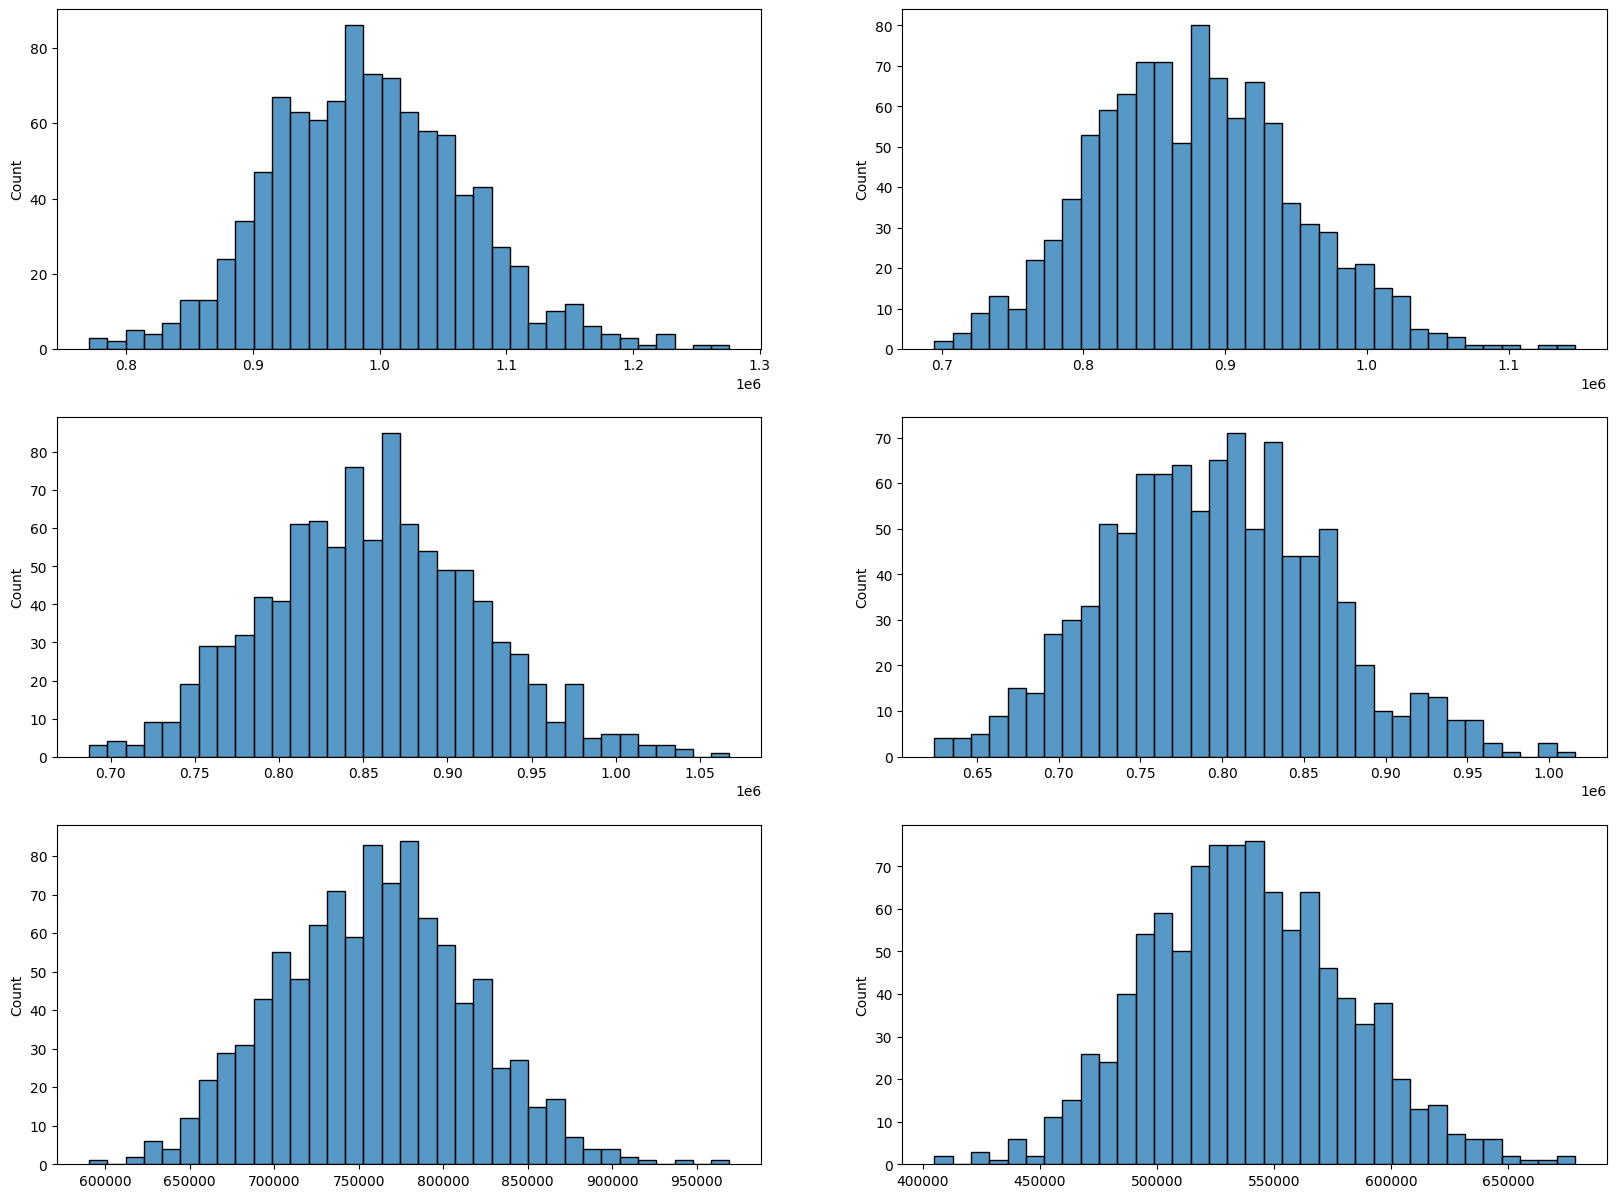

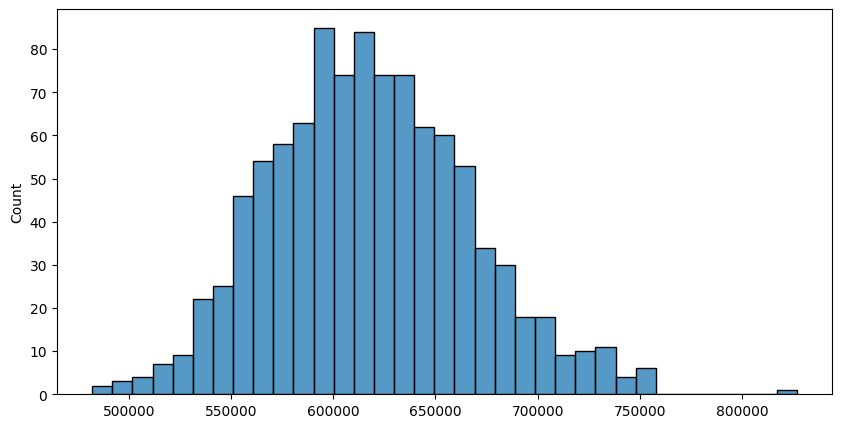

In [87]:
sample_size = 200
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):

        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)



fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0])
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1])
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0])
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1])
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2, 1])

plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35)
plt.show()

**Insight:**

The means sample seems to be normally distributed for all age groups. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

In [88]:
# Define the z-values for different confidence intervals
z_values = {
    90: 1.645,
    95: 1.960,
    99: 2.576
}

# Define parameters
sample_size = 200
num_repitions = 1000

# Initialize dictionaries to store means
all_population_means = {}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

# Calculate population means for each age group
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i] = []
    population_mean = avgamt_age[avgamt_age['Age'] == i]['Purchase'].mean()
    all_population_means[i].append(population_mean)

print("All age group population mean: \n", all_population_means)
print("\n")

# Calculate sample means for each age group
for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age'] == i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)

# Loop over each confidence interval
for ci, z in z_values.items():
    print(f"\nFor {ci}% Confidence Interval:")

    # Calculate confidence intervals for each age group
    for val in age_intervals:
        new_df = avgamt_age[avgamt_age['Age'] == val]

        # Calculate standard error and confidence intervals
        std_error = z * new_df['Purchase'].std() / np.sqrt(len(new_df))
        sample_mean = new_df['Purchase'].mean()
        lower_lim = sample_mean - std_error
        upper_lim = sample_mean + std_error

        # Print the confidence interval for the current age group
        print(f"For age {val} confidence interval of means: ({lower_lim:.2f}, {upper_lim:.2f})")




All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}



For 90% Confidence Interval:
For age 26-35 confidence interval of means: (952206.28, 1027112.35)
For age 36-45 confidence interval of means: (832398.89, 926932.53)
For age 18-25 confidence interval of means: (810187.65, 899538.59)
For age 46-50 confidence interval of means: (726209.00, 858888.57)
For age 51-55 confidence interval of means: (703772.36, 822629.48)
For age 55+ confidence interval of means: (487032.92, 592361.57)
For age 0-17 confidence interval of means: (542320.46, 695415.16)

For 95% Confidence Interval:
For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence inte

**Insight:**

*  We can see the sample means are closer to the population mean for the differnt age groups. And, with greater confidence interval we have the upper limit and lower limit range increases. As we have seen for gender and marital status, by increasing the sample size we can have the mean of the sample means closer to the population.

**Key Points:**

**Q. Are women spending more money per transaction than men? Why or Why not?**

*  No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women).

**Q.  Confidence intervals and distribution of the mean of the expenses by female and male customers.**

*  With 99% Confidence ,sample size 1000 we can say that
  1.  Average amount spend by male customers lie in the range 9,23,406.34 - 9,28,603.86

  2.  Average amount spend by female customers lie in range 7,09,255.90 - 7,13,541.96

**Q. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

*   No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

**Q. Results when the same activity is performed for Married vs Unmarried**

*  With 99% Confidence with sample size 1000 we can say that
    1.  Average amount spend by married customers lie in the range: [839813.68, 844704.77]
    2.  Average amount spend by unmarried customers lie in the range: [878490.61, 883476.87]

**Q.  Results when the same activity is performed for Age**

*  With 99% Confidence Interval with sample size 200 we can say that

   For 99% Confidence Interval:

   For age 26-35 confidence interval of means: (931009.46, 1048309.18)

   For age 36-45 confidence interval of means: (805647.89, 953683.53)

   For age 18-25 confidence interval of means: (784903.24, 924823.00)

   For age 46-50 confidence interval of means: (688663.50, 896434.06)

   For age 51-55 confidence interval of means: (670138.33, 856263.52)

   For age 55+ confidence interval of means: (457227.15, 622167.34)
   
   For age 0-17 confidence interval of means: (498997.92, 738737.71)


# **Recommendations:**



*  Based on the data, we can see that men spent more money on Black Friday compared to women. However, this doesn't mean the company should only focus on products for men. It's possible that men are paying for women's shopping. Therefore, the company should consider both men and women equally when making decisions.

*  Product Categories 1, 5, and 8 exhibit the highest purchasing frequencies, indicating strong demand. The company should prioritize increasing the sales of products in these categories.

*  Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

*  Customers aged 26-35 are the top spenders. The company should target this age group for customer acquisition to drive higher sales.

*  We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.

*  Male customers in City Category C spend significantly more than males in Categories A and B. Increasing sales efforts in City Category C will likely boost revenue.

*  Certain product categories such as 19, 20, and 13 show low purchasing activity. It might be worth considering discontinuing these products to streamline offerings.

*  The top 10 customers who make the highest purchases should be offered exclusive discounts and promotions to retain their loyalty and continue benefiting the company's growth.

*  Occupations that contribute the most to sales could be a key target for special offers, such as credit cards or exclusive benefits, through partnerships with financial institutions to drive further sales.

*  The top-selling products must be maintained at high quality to ensure continued success and to further increase sales in these categories.

*  Customers who have lived in the city for around a year contribute to 35% of the total sales. The company should focus on this mid-tenure group, as they are neither too new nor too established, offering a strong potential for continued business.

*  There is a high frequency of purchases in the 5k-10k range, which indicates significant demand. The company should consider focusing more on mid-range products to further drive sales.
